# Movie Metadata EDA

In [2]:
import collections
from time import time
from multiprocessing import Pool, cpu_count
import tqdm  # show multi-processing progress bar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

# for auto reload a module after editing.
%load_ext autoreload
%autoreload 2

In [6]:
file = "./data/movie_list/metadata_2014-2019.csv"
df = pd.read_csv(file)
with open("./data/movie_list/_excluded_movies.txt", "r") as f:
    excluded_movies = f.read().split('\n')
df = df[~df['Title'].isin(excluded_movies)]

df = df[df['budget'] > 1]
df['boOpening_to_budget_ratio'] = df['bo_opening'] / df['budget']

In [4]:
f_company_list = "./data/feature_company_list.txt"
f_mpaa_list = "./data/feature_mpaa_list.txt"
f_genre_list = "./data/feature_genre_list.txt"
f_director_list = "./data/feature_director_list.txt"
f_actor_list = "./data/feature_actor_list.txt"

## 1. Inspect each feature

### 1.1 Company

In [4]:
company_count = collections.Counter(df.company)
print("Total companies: {}.".format(len(company_count)))
company_count.most_common(30)

Total companies: 43.


[('Warner Bros.', 101),
 ('Universal Pictures', 87),
 ('Lionsgate', 73),
 ('Twentieth Century Fox', 71),
 ('Paramount Pictures', 58),
 ('Walt Disney Studios', 57),
 ('Sony Pictures Releasing', 51),
 ('STX Entertainment', 24),
 ('Focus Features', 20),
 ('Open Road Films (II)', 17),
 ('Fox Searchlight Pictures', 16),
 ('Screen Gems', 15),
 ('TriStar Pictures', 11),
 ('The Weinstein Company', 11),
 ('Relativity Media', 11),
 ('Roadside Attractions', 9),
 ('A24', 9),
 ('United Artists Releasing', 6),
 ('Pure Flix Entertainment', 5),
 ('BH Tilt', 5),
 ('Broad Green Pictures', 4),
 ('Metro-Goldwyn-Mayer (MGM)', 4),
 ('Freestyle Releasing', 3),
 ('Bleecker Street Media', 3),
 ('Entertainment Studios Motion Pictures', 3),
 ('Annapurna Pictures', 3),
 ('IFC Films', 2),
 ('Clarius Entertainment', 2),
 ('Dimension Films', 2),
 ('Sony Pictures Classics', 2)]

In [5]:
top = 15
top_items = [e[0] for e in company_count.most_common(top)]
with open(f_company_list, 'w') as f:
    for e in top_items:
        f.write(e + "\n")

### 1.2 mpaa

In [6]:
mpaa_count = collections.Counter(df.mpaa)
print("Total mpaa: {}.".format(len(mpaa_count)))
mpaa_count.most_common()

Total mpaa: 5.


[('PG-13', 309), ('R', 258), ('PG', 129), ('G', 5), (nan, 3)]

In [7]:
top = 4
top_items = [e[0] for e in mpaa_count.most_common(top)]
with open(f_mpaa_list, 'w') as f:
    for e in top_items:
        f.write(e + "\n")

### 1.3 genres

In [8]:
genres_lists = list(df['genres'].apply(lambda x: [genre for genre in x.split(",")]))
genres_count = collections.Counter([i for genres_list in genres_lists for i in genres_list])
print("Total genre kinds: {}. Total genre tags: {}".format(len(genres_count), sum(genres_count.values())))
genres_count.most_common()

Total genre kinds: 21. Total genre tags: 2398


[('Drama', 325),
 ('Comedy', 273),
 ('Action', 251),
 ('Thriller', 234),
 ('Adventure', 232),
 ('Fantasy', 134),
 ('Sci-Fi', 132),
 ('Family', 120),
 ('Crime', 116),
 ('Mystery', 112),
 ('Horror', 97),
 ('Romance', 92),
 ('Biography', 75),
 ('Animation', 67),
 ('History', 35),
 ('Music', 29),
 ('Musical', 24),
 ('War', 21),
 ('Sport', 19),
 ('Western', 6),
 ('Documentary', 4)]

In [9]:
top = 20
top_items = [e[0] for e in genres_count.most_common(top)]
with open(f_genre_list, 'w') as f:
    for e in top_items:
        f.write(e + "\n")

### 1.4 director

In [10]:
director_count = collections.Counter(df.director)
print("Total director: {}.".format(len(director_count)))
director_count.most_common(30)

Total director: 513.


[('Clint Eastwood', 5),
 ('Tyler Perry', 5),
 ('Anthony Russo', 4),
 ('Jaume Collet-Serra', 4),
 ('Ridley Scott', 4),
 ('Sean Anders', 4),
 ('Paul Feig', 4),
 ('Francis Lawrence', 3),
 ('Michael Bay', 3),
 ('Bryan Singer', 3),
 ('Nicholas Stoller', 3),
 ('Tim Story', 3),
 ('Wes Ball', 3),
 ('Antoine Fuqua', 3),
 ('David Ayer', 3),
 ('Ben Falcone', 3),
 ('Lasse Hallström', 3),
 ('James Bobin', 3),
 ('Kenneth Branagh', 3),
 ('Chad Stahelski', 3),
 ('Jake Kasdan', 3),
 ('Christopher Landon', 3),
 ('Jon Favreau', 3),
 ('Mike Flanagan', 3),
 ('Andrew Erwin', 3),
 ('James Wan', 3),
 ('F. Gary Gray', 3),
 ('Steven Spielberg', 3),
 ('M. Night Shyamalan', 3),
 ('Denis Villeneuve', 3)]

In [11]:
top = 30
top_items = [e[0] for e in director_count.most_common(top)]
with open(f_director_list, 'w') as f:
    for e in top_items:
        f.write(e + "\n")

### 1.5 actors

In [12]:
actors_lists = list(df['actors'].apply(lambda x: [actor for actor in x.split(",")]))
actors_count = collections.Counter([i for actors_list in actors_lists for i in actors_list])
print("Total actors: {}.".format(len(actors_count)))
actors_count.most_common(30)

Total actors: 1595.


[('Kevin Hart', 14),
 ('Dwayne Johnson', 12),
 ('Mark Wahlberg', 10),
 ('Woody Harrelson', 9),
 ('Samuel L. Jackson', 9),
 ('Cate Blanchett', 9),
 ('Chris Hemsworth', 9),
 ('Scarlett Johansson', 8),
 ('Will Arnett', 8),
 ('James McAvoy', 8),
 ('Seth Rogen', 8),
 ('Emily Blunt', 8),
 ('Liam Neeson', 8),
 ('Michael Keaton', 8),
 ('Charlize Theron', 8),
 ('Chris Pratt', 7),
 ('Jennifer Lawrence', 7),
 ('Chris Evans', 7),
 ('Will Ferrell', 7),
 ('Emma Stone', 7),
 ('Matthew McConaughey', 7),
 ('Gerard Butler', 7),
 ('Zac Efron', 7),
 ('Michael Peña', 7),
 ('Melissa McCarthy', 7),
 ('Owen Wilson', 7),
 ('Steve Carell', 7),
 ('Anna Kendrick', 7),
 ('Robert Downey Jr.', 7),
 ('Jason Statham', 7)]

In [13]:
top = 30
top_items = [e[0] for e in actors_count.most_common(top)]
with open(f_actor_list, 'w') as f:
    for e in top_items:
        f.write(e + "\n")

### 1.6 release_date

In [14]:
release_weekday = list(df['release_date'].apply(lambda x: 
                        calendar.day_name[datetime.datetime.strptime(x, "%Y-%m-%d").weekday()]))
weekday_count = collections.Counter(release_weekday).most_common()
weekday_count

[('Friday', 636),
 ('Wednesday', 54),
 ('Thursday', 8),
 ('Tuesday', 5),
 ('Monday', 1)]

### 1.7 runtime

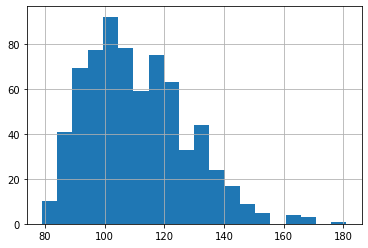

In [15]:
df['runtime'].hist(bins=20)

## 2. Relation between Box Office, Budget, and IMDB Score

### 2.1 Distribution of budget, bo_opening, imdb_score

Text(0.5, 1.0, 'Distribution of imdb_score')

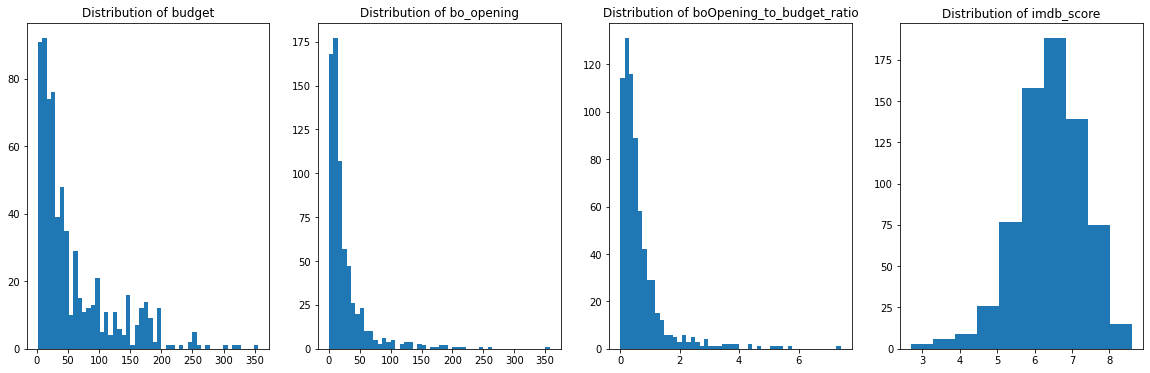

In [21]:
fig, ax = plt.subplots(figsize = (20, 6))
plt.subplot(1, 4, 1)
plt.hist(df['budget'], bins=50)
plt.title('Distribution of budget')
plt.subplot(1, 4, 2)
plt.hist(df['bo_opening'], bins=50)
plt.title('Distribution of bo_opening')
plt.subplot(1, 4, 3)
plt.hist(df['boOpening_to_budget_ratio'], bins=50)
plt.title('Distribution of boOpening_to_budget_ratio')
plt.subplot(1, 4, 4)
plt.hist(df['imdb_score'])
plt.title('Distribution of imdb_score')

### 2.2  bo_gross vs budget, bo_opening vs budget, bo_opening vs bo_gross

Text(0, 0.5, 'Log bo_gross')

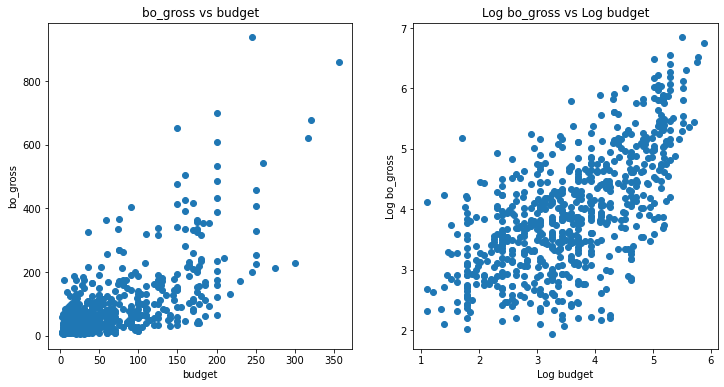

In [23]:
x = 'budget'
y = 'bo_gross'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df[x], df[y])
plt.title('{} vs {}'.format(y, x))
plt.xlabel(x)
plt.ylabel(y)

plt.subplot(1, 2, 2)
plt.scatter(np.log1p(df[x]), np.log1p(df[y]))
plt.title('Log {} vs Log {}'.format(y, x))
plt.xlabel('Log ' + x)
plt.ylabel('Log ' + y)

Text(0, 0.5, 'Log bo_opening')

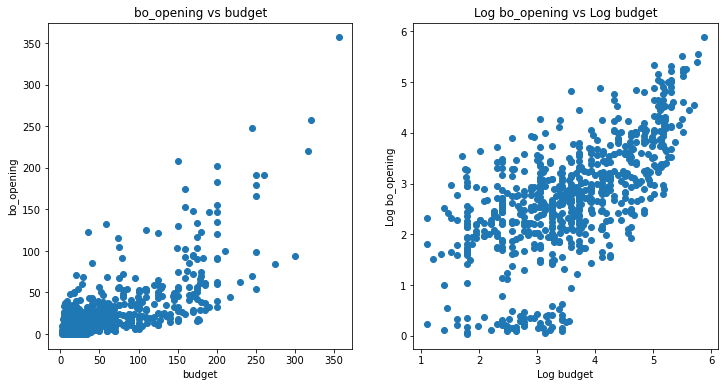

In [24]:
x = 'budget'
y = 'bo_opening'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df[x], df[y])
plt.title('{} vs {}'.format(y, x))
plt.xlabel(x)
plt.ylabel(y)

plt.subplot(1, 2, 2)
plt.scatter(np.log1p(df[x]), np.log1p(df[y]))
plt.title('Log {} vs Log {}'.format(y, x))
plt.xlabel('Log ' + x)
plt.ylabel('Log ' + y)

Text(0, 0.5, 'Log bo_opening')

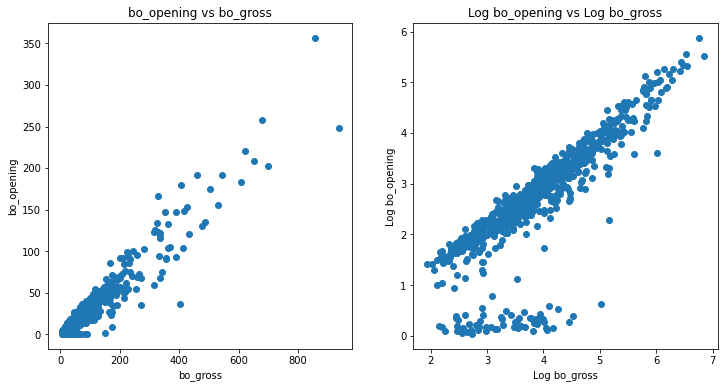

In [25]:
x = 'bo_gross'
y = 'bo_opening'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df[x], df[y])
plt.title('{} vs {}'.format(y, x))
plt.xlabel(x)
plt.ylabel(y)

plt.subplot(1, 2, 2)
plt.scatter(np.log1p(df[x]), np.log1p(df[y]))
plt.title('Log {} vs Log {}'.format(y, x))
plt.xlabel('Log ' + x)
plt.ylabel('Log ' + y)

Text(0, 0.5, 'imdb_score')

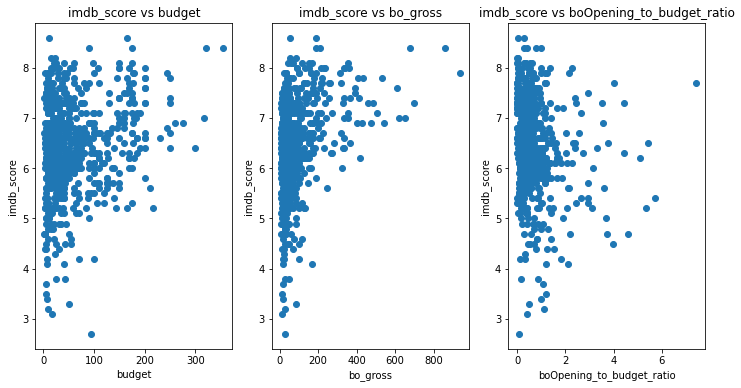

In [7]:
x = 'budget'
y = 'imdb_score'
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(df[x], df[y])
plt.title('{} vs {}'.format(y, x))
plt.xlabel(x)
plt.ylabel(y)

x = 'bo_gross'
y = 'imdb_score'
plt.subplot(1, 3, 2)
plt.scatter(df[x], df[y])
plt.title('{} vs {}'.format(y, x))
plt.xlabel(x)
plt.ylabel(y)

x = 'boOpening_to_budget_ratio'
y = 'imdb_score'
plt.subplot(1, 3, 3)
plt.scatter(df[x], df[y])
plt.title('{} vs {}'.format(y, x))
plt.xlabel(x)
plt.ylabel(y)

## 3. Metadata features v.s. Box office

In [29]:
### 3.1 Genres

In [13]:
df.loc[:, 'isHorror'] = df.loc[:, 'genres'].apply(lambda x : 'Horror' in x )

Text(0, 0.5, 'count')

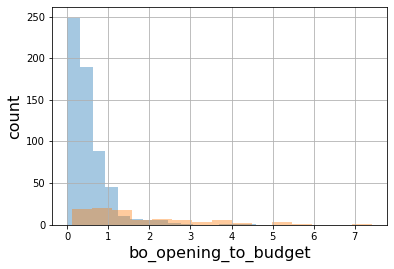

In [30]:
# fig, ax = plt.subplots()
df.groupby("isHorror")['boOpening_to_budget_ratio'].hist(bins=15, alpha=0.4)
plt.xlabel("bo_opening_to_budget", fontsize=16)
plt.ylabel("count", fontsize=16)
# ax.legend()